# Regression Modelling Method

### Required Libraries and settings

In [1]:
from pandas import json_normalize
import requests
import json
import os
import re
import time
import fnmatch
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import mysql.connector
from pandas.io import sql
from sqlalchemy import create_engine
import pymysql
import scipy.stats as stats
pymysql.install_as_MySQLdb()
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Get Current working directory
print(os.getcwd())

#Sho dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist: 
    print(i)

c:\Desktop\data_analytics_project\dataanalytics\06_Statistical Data Analysis & Modelling


#### Required additional installations

In [2]:
#pip install statsmodels
#pip install -U scikit-learn
#pip install scikit-learn==1.1.2
#pip install cryptography

### Start connection to mysql DB

In [3]:
#DB Start connection to mysql
mydb = pymysql.connect(
  host="localhost",
  user="root",
  password="123turtle123!")

print(mydb)

# Create data base
cursor = mydb.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS projectDA_database")

# Show data bases in my sql
cursor.execute("SHOW DATABASES")

for x in cursor:
  print(x)


('eatily',)
('exercise',)
('health',)
('information_schema',)
('mysql',)
('performance_schema',)
('project3a',)
('project3b',)
('projectda_database',)
('sys',)


In [4]:
conn = pymysql.connect(
host="localhost",
user="root",
password="123turtle123!",
database="projectda_database")

print(conn)

cursor = conn.cursor()

db_data = 'mysql+mysqldb://' + 'root' + ':' + '123turtle123!' + '@' + 'localhost' + ':3306/' \
       + 'projectda_database' + '?charset=utf8mb4'
engine = create_engine(db_data)

# Connect to the database
connection = pymysql.connect(host='localhost',
                         user='root',
                         password='123turtle123!',
                         db='projectda_database')  

In [5]:
#define fields for upload mysqldb
df_apartments_database = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')[['web-scraper-order', 'full_address', 'description', 'type', 'rooms', 'area', 'price', 'PLZ', 'Street', 'luxurious', 'furnished', 'balcony', 'garden', 'quiet', 'central', 'price_per_m2', 'price_cat', 'area_cat', 'Ortschaftsname', 'BfS_Id', 'Kantonskürzel', 'Kantonssteuerfuss', 'Gemeindesteuerfuss', 'steuersatz_kombiniert']]
print(df_apartments_database.shape)
df_apartments_database.head(5)


(11302, 24)


,web-scraper-order,full_address,description,type,rooms,area,price,PLZ,Street,luxurious,...,central,price_per_m2,price_cat,area_cat,Ortschaftsname,BfS_Id,Kantonskürzel,Kantonssteuerfuss,Gemeindesteuerfuss,steuersatz_kombiniert
0,1672673926-34302,6963 Pregassona,IN ZONA RESIDENZIALE TRANQUILLA E SOLEGGIATA P...,Wohnung,3.5,110,1000000,6963,,1.0,...,0.0,9090.91,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
1,1672673926-34301,"Via Ceresio 39A, 6963 Pregassona","A PREGASSONA, PROPONIAMO IN VENDITA UN LUMINOS...",Wohnung,3.5,80,500000,6963,Via Ceresio 39A,1.0,...,0.0,6250.00,medium,50 - 99,Pregassona,5192,TI,97.0,77.0,174.0
2,1672673272-29951,"Via Vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,141,1200000,6963,Via Vedo 3,1.0,...,1.0,8510.64,medium,100-149,Pregassona,5192,TI,97.0,77.0,174.0
3,1672673272-29952,"Via vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,238,2360000,6963,Via vedo 3,1.0,...,1.0,9915.97,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
4,1672673816-33571,"via Ceresio, 6963 Pregassona",A PREGASSONA COMODISSIMO MONOLOCALE AL SECONDO...,Wohnung,1.0,30,270000,6963,via Ceresio,0.0,...,0.0,9000.00,medium,0 - 49,Pregassona,5192,TI,97.0,77.0,174.0


In [6]:
#Dimension (rows, columns)
print('Dimension: ', df_apartments_database.shape)

#Number of Rows
print('Number of Rows: ', df_apartments_database.shape[0])

#Number of Columns
print('Number of Columns: ', df_apartments_database.shape[1])

# Get data types
df_apartments_database.dtypes


Dimension:  (11302, 24)
Number of Rows:  11302
Number of Columns:  24


web-scraper-order         object
full_address              object
description               object
type                      object
rooms                    float64
area                       int64
price                      int64
PLZ                        int64
Street                    object
luxurious                float64
furnished                float64
balcony                  float64
garden                   float64
quiet                    float64
central                  float64
price_per_m2             float64
price_cat                 object
area_cat                  object
Ortschaftsname            object
BfS_Id                     int64
Kantonskürzel             object
Kantonssteuerfuss        float64
Gemeindesteuerfuss       float64
steuersatz_kombiniert    float64
dtype: object

In [7]:
#define field for uploads

df_apartments_database = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')[['web-scraper-order', 'full_address', 'description', 'type', 'rooms', 'area', 'price', 'PLZ', 'Street', 'luxurious', 'furnished', 'balcony', 'garden', 'quiet', 'central', 'price_per_m2', 'price_cat', 'area_cat', 'Ortschaftsname', 'BfS_Id', 'Kantonskürzel', 'Kantonssteuerfuss', 'Gemeindesteuerfuss', 'steuersatz_kombiniert']]
print(df_apartments_database.shape)
df_apartments_database.head(5)

(11302, 24)


,web-scraper-order,full_address,description,type,rooms,area,price,PLZ,Street,luxurious,...,central,price_per_m2,price_cat,area_cat,Ortschaftsname,BfS_Id,Kantonskürzel,Kantonssteuerfuss,Gemeindesteuerfuss,steuersatz_kombiniert
0,1672673926-34302,6963 Pregassona,IN ZONA RESIDENZIALE TRANQUILLA E SOLEGGIATA P...,Wohnung,3.5,110,1000000,6963,,1.0,...,0.0,9090.91,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
1,1672673926-34301,"Via Ceresio 39A, 6963 Pregassona","A PREGASSONA, PROPONIAMO IN VENDITA UN LUMINOS...",Wohnung,3.5,80,500000,6963,Via Ceresio 39A,1.0,...,0.0,6250.00,medium,50 - 99,Pregassona,5192,TI,97.0,77.0,174.0
2,1672673272-29951,"Via Vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,141,1200000,6963,Via Vedo 3,1.0,...,1.0,8510.64,medium,100-149,Pregassona,5192,TI,97.0,77.0,174.0
3,1672673272-29952,"Via vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,238,2360000,6963,Via vedo 3,1.0,...,1.0,9915.97,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
4,1672673816-33571,"via Ceresio, 6963 Pregassona",A PREGASSONA COMODISSIMO MONOLOCALE AL SECONDO...,Wohnung,1.0,30,270000,6963,via Ceresio,0.0,...,0.0,9000.00,medium,0 - 49,Pregassona,5192,TI,97.0,77.0,174.0


In [8]:
# create cursor
cursor=connection.cursor()
# Execute the to_sql for writting DF into SQL
df_apartments_database.to_sql('dataset_homegate_table', engine, if_exists='replace', index=False)    

# Execute query
sql = "SELECT * FROM `dataset_homegate_table`"
cursor.execute(sql)

engine.dispose()

In [9]:
# Query the SQL-table
cursor.execute('SELECT * FROM projectda_database.dataset_homegate_table;')

df = pd.DataFrame(cursor.fetchall())    
print(df)

                     0                                 1   \
0      1672673926-34302                   6963 Pregassona   
1      1672673926-34301  Via Ceresio 39A, 6963 Pregassona   
2      1672673272-29951         Via Vedo 3, 6963 Cureggia   
3      1672673272-29952         Via vedo 3, 6963 Cureggia   
4      1672673816-33571      via Ceresio, 6963 Pregassona   
...                 ...                               ...   
11297  1672672530-27225             6545 Brione s/Minusio   
11298  1672672530-27237       Dorfstrasse 7b, 5624 Bünzen   
11299  1672672536-27271                      6275 Ballwil   
11300  1672672536-27272                      6275 Ballwil   
11301  1672672539-27282                        3951 Agarn   

                                                      2        3    4    5   \
0      IN ZONA RESIDENZIALE TRANQUILLA E SOLEGGIATA P...  Wohnung  3.5  110   
1      A PREGASSONA, PROPONIAMO IN VENDITA UN LUMINOS...  Wohnung  3.5   80   
2      RESIDENZE GOLD & SILVER

In [10]:
#Define columns

columns = ['web-scraper-order', 'full_address', 'description', 'type', 'rooms', 'area', 'price', 'PLZ', 'Street', 'luxurious', 'furnished', 'balcony', 'garden', 'quiet', 'central', 'price_per_m2', 'price_cat', 'area_cat', 'Ortschaftsname', 'BfS_Id', 'Kantonskürzel', 'Kantonssteuerfuss', 'Gemeindesteuerfuss', 'steuersatz_kombiniert']

#cursor.execute('SELECT * FROM projectda_database.dataset_homegate_table;')
cursor.execute('SELECT type, rooms, area, price, price_per_m2 FROM projectda_database.dataset_homegate_table;')

df = pd.DataFrame(cursor.fetchall())    
#print(df)

print(df.shape)
df.head(5)


(11302, 5)


,0,1,2,3,4
0,Wohnung,3.5,110,1000000,9090.91
1,Wohnung,3.5,80,500000,6250.00
2,Wohnung,4.5,141,1200000,8510.64
3,Wohnung,4.5,238,2360000,9915.97
4,Wohnung,1.0,30,270000,9000.00


# Linear regression

In order to evaluate our main hypothesis: The higher the Mean Value of the cantonal tax percentage (cantonal tax percentage + municipal tax percentage), the lower are the house and apartment prices in Switzerland. Additional hypotheses and null hypotheses are made to support the research study.


Hypotheses 1.

H1: The  tax rate influences the purchase price per m2 of apartments and houses. <br>
H0: The  tax rate does not influence the purchase price per m2 of apartments and houses.

Hypotheses 2. 

H1: The tax rate and the number of square meters influence the purchase price per m2 of apartments and houses. <br>
H0: The tax rate and the number of square meters do not influence the purchase price per m2 of apartments and houses.


### Retrieve data from MySQL Database

In [11]:
#SQL-Query
df_apartments_database = pd.read_sql("select * from projectda_database.dataset_homegate_table", conn)
print(df_apartments_database.shape)
df_apartments_database.head(5)

# Rename variable 'web-scraper-order' to 'apmt_id'
df_apartments_database = df_apartments_database.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_apartments_database.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

print(df.shape)
df.head(5)


(11302, 24)
(11276, 24)


,id,full_address,description,type,rooms,area,price,PLZ,Street,luxurious,...,central,price_per_m2,price_cat,area_cat,Ortschaftsname,BfS_Id,Kantonskürzel,Kantonssteuerfuss,Gemeindesteuerfuss,steuersatz_kombiniert
0,1672673926-34302,6963 Pregassona,IN ZONA RESIDENZIALE TRANQUILLA E SOLEGGIATA P...,Wohnung,3.5,110,1000000,6963,,1.0,...,0.0,9090.91,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
1,1672673926-34301,"Via Ceresio 39A, 6963 Pregassona","A PREGASSONA, PROPONIAMO IN VENDITA UN LUMINOS...",Wohnung,3.5,80,500000,6963,Via Ceresio 39A,1.0,...,0.0,6250.00,medium,50 - 99,Pregassona,5192,TI,97.0,77.0,174.0
2,1672673272-29951,"Via Vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,141,1200000,6963,Via Vedo 3,1.0,...,1.0,8510.64,medium,100-149,Pregassona,5192,TI,97.0,77.0,174.0
3,1672673272-29952,"Via vedo 3, 6963 Cureggia","RESIDENZE GOLD & SILVER, 2 PALAZZINE OGNUNA CO...",Wohnung,4.5,238,2360000,6963,Via vedo 3,1.0,...,1.0,9915.97,high,100-149,Pregassona,5192,TI,97.0,77.0,174.0
4,1672673816-33571,"via Ceresio, 6963 Pregassona",A PREGASSONA COMODISSIMO MONOLOCALE AL SECONDO...,Wohnung,1.0,30,270000,6963,via Ceresio,0.0,...,0.0,9000.00,medium,0 - 49,Pregassona,5192,TI,97.0,77.0,174.0


## Simple linear regression

<b>Hypotheses 1:</b>

H1: The tax rate influences the purchase price per m2 of apartments and houses. <br>
H0: The tax rate does not influence the purchase price per m2 of apartments and houses. 


We use simple linear regression to investigate the influence of the independent variable "steuersatz_kombiniert (tax rate)" on the purchase price per m2 of apartments and houses.

### Create train and test samples for the simple linear regression


In [12]:
# Simple linear regression (only one explanatory variable in the model)
# Create train and test samples (train = 80%, test = 20% of the data)
# one independent variable "steuersatz_kombiniert" and one dependent variable "price_per_m2"

# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df['steuersatz_kombiniert'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, 
                                                    random_state=42)
                                                    
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
9723    156.0
9722    156.0
2369    215.0
8539    175.0
9666    179.0
Name: steuersatz_kombiniert, dtype: float64 

y_train:
9723     9083.33
9722     8961.96
2369    11940.35
8539    10166.67
9666     7155.17
Name: price_per_m2, dtype: float64


### Fit the simple linear regression model 

In [13]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            9706.79
Slope of regression line (beta):          -6.792
p-value:                                  0.0000
R-squared (coefficient of determination): 0.0135


### Interpretation of the linear regression results

The p-value of 0.0000 is smaller than <0.05 and signfies that the null hypothesis can be rejected.

The larger the R-squared value, the better the prediction ot the y-value (price). In this case, the <b>R-squared is 0.0135</b> . The result could be better.

### Plot simple Linear Regression

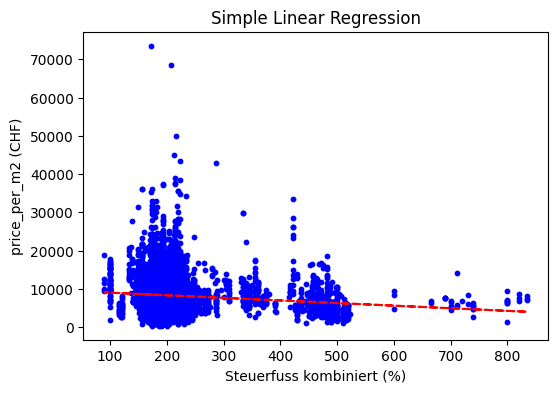

In [14]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='blue')
plt.plot(X_train, mymodel, color='red', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('Steuerfuss kombiniert (%)')
plt.ylabel('price_per_m2 (CHF)')

plt.show()


The blue dots represents each datapoint of our dataset. If we compare the actual to the estimated value, this regression line above shows a lot of errors. The linear is negative so theres a negative relationship between the independent variable x tax rate (the variable we manipulate) and the dependent variable price per m2. 

### Check model residuals
What is the first predicted value and the first observed value in the dataset? Subtracting these values gives us the residual value.  But what is a residual? A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.


In [18]:
# Calculate residuals (here: predicted prices minus observed prices)

# ! first remove .iloc[i] run it, after add .iloc[i] and run it again to get the residuals
residuals = mymodel - y_train.iloc[i] 

# Check the first residual value in our dataset

print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')

for i in range(0,1):
    print(f'1st Observed price in dataset: {y_train.iloc[i]:.2f}')


print(f'1st Residual price in dataset: {residuals[0]:.2f}')




1st Predicted price in dataset: 8647.30
1st Observed price in dataset: 9083.33
1st Residual price in dataset: -436.03


### Plot histogram of residuals

We use the residual value to check if the model assumptions are met.

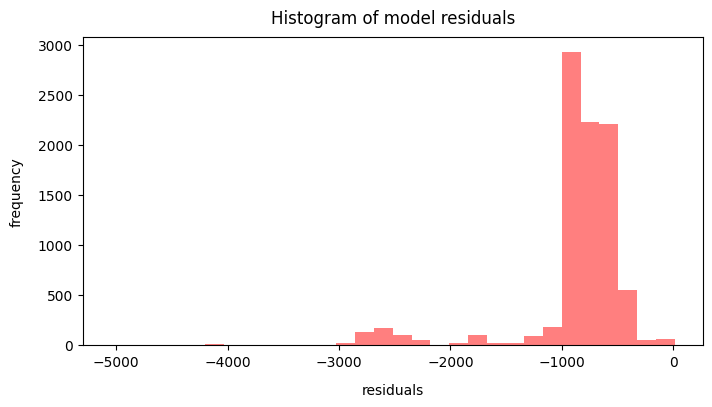

In [29]:
# Plot histogram of residuals (Steuersatz_kombiniert -> price_per_m2)
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=30, 
                            color='red',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-3100, 70, s="",  
         fontsize=11, 
         color="black")

# Show plot
plt.show()

The residuals tend to be on the right side. For us to assume that the assumptions are correct, the values would have to lay around 0 and be bell shaped. Also the model has a lot of outliners and a gap.

### Compare the predicted prices with the observed prices in our test sample

In [31]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare predicted with observed price_per_m2 based on first 10 test samples
for i in range(0,10):
    print(f'Predicted price: {predicted.iloc[i]:.1f}, Observed price: {y_test.iloc[i]:.1f}')

Predicted price: 8212.6, Observed price: 5056.8
Predicted price: 8887.0, Observed price: 3343.0
Predicted price: 8402.8, Observed price: 3310.8
Predicted price: 9027.6, Observed price: 10000.0
Predicted price: 8246.6, Observed price: 7253.3
Predicted price: 8287.3, Observed price: 6415.1
Predicted price: 8368.8, Observed price: 2241.4
Predicted price: 7295.8, Observed price: 8383.8
Predicted price: 6395.9, Observed price: 3611.1
Predicted price: 8416.4, Observed price: 6470.6


### Multiple linear regression 

If two independent variables are used (area and tax rate), how is the purchase price per m2 affected?

<b> Hypotheses 2: </b>

H1: The tax rate and the number of square meters influence the purchase price per m2 of apartments and houses. <br>
H0: The tax rate and the number of square meters do not influence the purchase price per m2 of apartments and houses.

In [32]:
#Multiple linear regression (more than one explanatory variable in the model)

# Create train and test samples 
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'steuersatz_kombiniert']], 
                                                        df['price_per_m2'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      area  steuersatz_kombiniert
9723    60                  156.0
9722   184                  156.0
2369   171                  215.0
8539   150                  175.0
9666   116                  179.0 

y2_train:
9723     9083.33
9722     8961.96
2369    11940.35
8539    10166.67
9666     7155.17
Name: price_per_m2, dtype: float64


### Fit the multiple regression model 

In [33]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:           price_per_m2   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     80.75
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           1.74e-35
Time:                        15:05:54   Log-Likelihood:                -88644.
No. Observations:                9020   AIC:                         1.773e+05
Df Residuals:                    9017   BIC:                         1.773e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9279.55

### Interpretation of the OLS regression results above

R-squared: A value of 0.018 means, that the explanatory variables explain 2% of the variation of our target variable (purchase price per m2 of apartments and houses).


coef: These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are needed for the price predictions in our model.

P>|t|: These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. In this case, all variables are significant here and the null hypothesis can be rejected.


### Histogram of model residuals - multiple linear regression

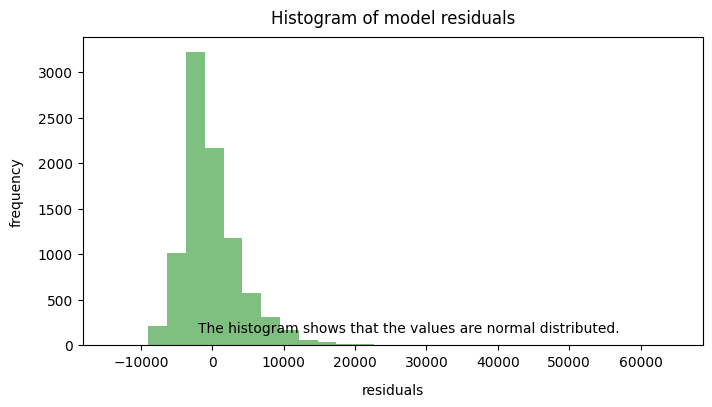

In [43]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=30, 
                            color='green',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-2000, 140, s="The histogram shows that the values are normal distributed.", fontsize=10, color="black")

plt.show()

The model is symmetric bell-shaped which is evenly distributed around zero, that indicates that the model is normal distirbuted.

### Compare the predicted prices with the observed prices in the test sample

In [36]:
# Add constant to X_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare predicted with observed price_per_m2 based on first 10 test samples
for i in range(0,10):
    print(f'Predicted price: {predicted_new.iloc[i]:.1f}, Observed price: {y_test.iloc[i]:.1f}')

Predicted price: 8029.9, Observed price: 5056.8
Predicted price: 8886.7, Observed price: 3343.0
Predicted price: 8182.3, Observed price: 3310.8
Predicted price: 8747.0, Observed price: 10000.0
Predicted price: 8032.2, Observed price: 7253.3
Predicted price: 8145.3, Observed price: 6415.1
Predicted price: 8179.9, Observed price: 2241.4
Predicted price: 7161.3, Observed price: 8383.8
Predicted price: 6261.9, Observed price: 3611.1
Predicted price: 8221.6, Observed price: 6470.6


## Regression tree

A regression tree is basically a decision tree. We use it to predict potentials outcomes. Our target variable is "price_per_m2".

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [37]:
# Create train and test samples
X3_train, X3_test, y3_train, y3_test = train_test_split(df[['area', 
                                                        'rooms',
                                                        'central',
                                                        'PLZ',
                                                        'steuersatz_kombiniert']], 
                                                        df['price_per_m2'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X3_train:')
print(X3_train.head(), '\n')

# Show y_train
print('y3_train:')
print(y3_train.head())

X3_train:
      area  rooms  central   PLZ  steuersatz_kombiniert
9723    60    2.5      0.0  4147                  156.0
9722   184    6.5      1.0  4147                  156.0
2369   171    4.5      1.0  3963                  215.0
8539   150    5.5      0.0  6645                  175.0
9666   116    4.5      0.0  6982                  179.0 

y3_train:
9723     9083.33
9722     8961.96
2369    11940.35
8539    10166.67
9666     7155.17
Name: price_per_m2, dtype: float64


In [48]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=4)

# Train decision tree regressor
reg = reg.fit(X3_train, y3_train)

# Predict the response for test dataset
y3_pred = reg.predict(X3_test)

### Calculate coefficient of determination (R-squared)


In [49]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y3_test, y3_pred).round(4))

R-squared: 0.2551


### R-square of the regression tree

The value 0.2551 shows a relatively low prediction and could be better.


### Print text representation of the regression tree


In [50]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X3_train.columns))

# Print text_representation
print(text_representation)

|--- PLZ <= 1301.00
|   |--- steuersatz_kombiniert <= 193.25
|   |   |--- steuersatz_kombiniert <= 175.50
|   |   |   |--- area <= 257.50
|   |   |   |   |--- value: [16700.46]
|   |   |   |--- area >  257.50
|   |   |   |   |--- value: [25641.72]
|   |   |--- steuersatz_kombiniert >  175.50
|   |   |   |--- PLZ <= 1208.50
|   |   |   |   |--- value: [17222.33]
|   |   |   |--- PLZ >  1208.50
|   |   |   |   |--- value: [13577.92]
|   |--- steuersatz_kombiniert >  193.25
|   |   |--- PLZ <= 1290.50
|   |   |   |--- steuersatz_kombiniert <= 222.75
|   |   |   |   |--- value: [11403.43]
|   |   |   |--- steuersatz_kombiniert >  222.75
|   |   |   |   |--- value: [9510.48]
|   |   |--- PLZ >  1290.50
|   |   |   |--- rooms <= 11.00
|   |   |   |   |--- value: [15861.55]
|   |   |   |--- rooms >  11.00
|   |   |   |   |--- value: [46631.65]
|--- PLZ >  1301.00
|   |--- PLZ <= 6891.50
|   |   |--- PLZ <= 6650.00
|   |   |   |--- PLZ <= 3636.00
|   |   |   |   |--- value: [6633.19]
|   |   |

### Vizualizing the regression tree

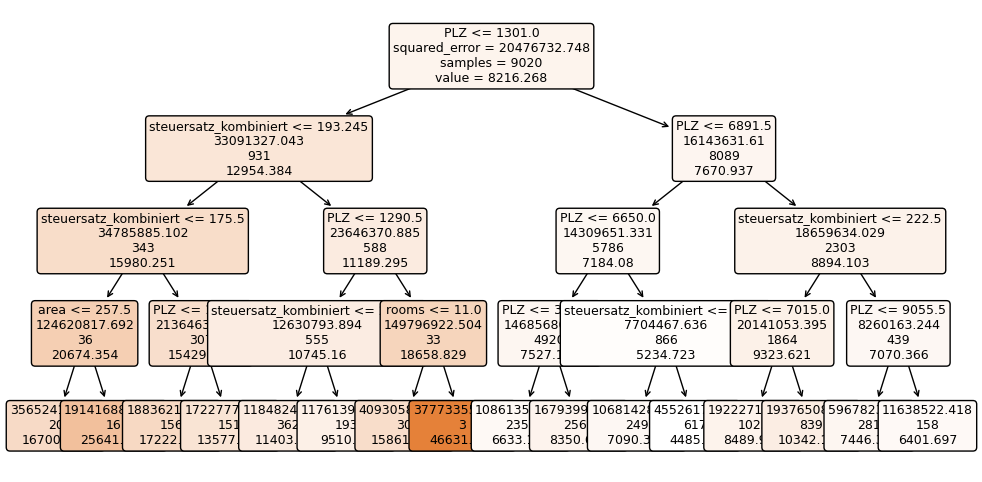

In [51]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X3_train.columns),  
                   class_names=['price_per_m2'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

### Random Forest Regression

The random forest regression helps to reduce overfitting and is suitable because we use a large dataset.

In [52]:
# Create train and test samples 
X4_train, X4_test, y4_train, y4_test = train_test_split(df[[
                                                            'area',
                                                            'rooms',
                                                            'central',
                                                            'PLZ',
                                                            'steuersatz_kombiniert']], 
                                                            df['price_per_m2'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X4_train
print('X4_train:')
print(X4_train.head(), '\n')

# Show y4_train
print('y4_train:')
print(y4_train.head())

X4_train:
      area  rooms  central   PLZ  steuersatz_kombiniert
9723    60    2.5      0.0  4147                  156.0
9722   184    6.5      1.0  4147                  156.0
2369   171    4.5      1.0  3963                  215.0
8539   150    5.5      0.0  6645                  175.0
9666   116    4.5      0.0  6982                  179.0 

y4_train:
9723     9083.33
9722     8961.96
2369    11940.35
8539    10166.67
9666     7155.17
Name: price_per_m2, dtype: float64


### Fit the Random Forest Regression

In [53]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X4_train, y4_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', reg_rf.score(X4_test, y4_test).round(4))

R-squared: 0.5412


#### Interpretation of R-squared 

The R-squared value is 0.5412. This means that the prediction is good but it could be better. The closer the value is to 1, the more accurate the prediction.

### Show feature importance

Which features (= explanatory variables) are particulary important?

Looking at the barchart below shows that the postal code is the most important feature. In contrast, the characteristic "central" is the least important. The feature tax rate is slightly more important than the number of square meters.

Index(['PLZ', 'steuersatz_kombiniert', 'area', 'rooms', 'central'], dtype='object')
[0.57429207 0.19126761 0.1476682  0.0775855  0.00918662]


<AxesSubplot: ylabel='features'>

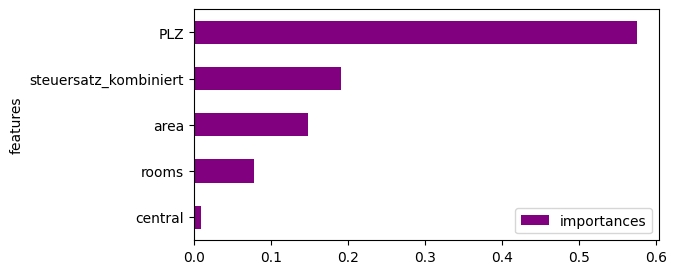

In [54]:
cols = X4_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='purple', 
           figsize=(6,3))